# **Decision Tree**

In [ ]:
import pandas as pd
import numpy as np
import random

class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)

    def _build_tree(self, X, y, depth):
        if depth == self.max_depth or len(np.unique(y)) == 1:
            return {'class': np.argmax(np.bincount(y))}

        best_split = self._find_best_split(X, y)
        if not best_split:
            return {'class': np.argmax(np.bincount(y))}

        left_data, right_data = best_split['left'], best_split['right']
        del best_split['left'], best_split['right']

        return {
            'feature_index': best_split['feature_index'],
            'threshold': best_split['threshold'],
            'left': self._build_tree(*left_data, depth + 1),
            'right': self._build_tree(*right_data, depth + 1)
        }

    def _find_best_split(self, X, y):
        num_features = X.shape[1]
        num_data = X.shape[0]
        best_gini = float('inf')
        best_split = None

        for feature_index in range(num_features):
            unique_values = np.unique(X[:, feature_index])
            unique_values.sort()

            for i in range(1, len(unique_values)):
                threshold = (unique_values[i - 1] + unique_values[i]) / 2
                left_data = (X[X[:, feature_index] <= threshold], y[X[:, feature_index] <= threshold])
                right_data = (X[X[:, feature_index] > threshold], y[X[:, feature_index] > threshold])
                gini = self._calculate_gini(left_data[1], right_data[1])

                if gini < best_gini:
                    best_gini = gini
                    best_split = {
                        'feature_index': feature_index,
                        'threshold': threshold,
                        'left': left_data,
                        'right': right_data
                    }

        return best_split

    def _calculate_gini(self, left_labels, right_labels):
        total = len(left_labels) + len(right_labels)
        gini_left = 1 - sum((np.count_nonzero(left_labels == label) / len(left_labels)) ** 2 for label in np.unique(left_labels))
        gini_right = 1 - sum((np.count_nonzero(right_labels == label) / len(right_labels)) ** 2 for label in np.unique(right_labels))
        return (len(left_labels) / total) * gini_left + (len(right_labels) / total) * gini_right

    def predict(self, X):
        return [self._predict_tree(x, self.tree) for x in X]

    def _predict_tree(self, x, node):
        if 'class' in node:
            return node['class']

        if x[node['feature_index']] <= node['threshold']:
            return self._predict_tree(x, node['left'])
        else:
            return self._predict_tree(x, node['right'])



df = pd.read_csv('Q1Data.csv')


X = df.iloc[:, :6].values
y = df['Genus'].values


from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


random.seed(42)
indices = list(range(len(X)))
random.shuffle(indices)
X, y = X[indices], y[indices]


split_index = int(0.2 * len(X))
X_train, y_train = X[:split_index], y[:split_index]
X_test, y_test = X[split_index:], y[split_index:]


tree = DecisionTree(max_depth=15)
tree.fit(X_train, y_train)


predictions = tree.predict(X_test)


accuracy = sum(1 for true, pred in zip(y_test, predictions) if true == pred) / len(y_test)
print(f"Accuracy on the test set: {accuracy:.2f}")


Accuracy on the test set: 0.88


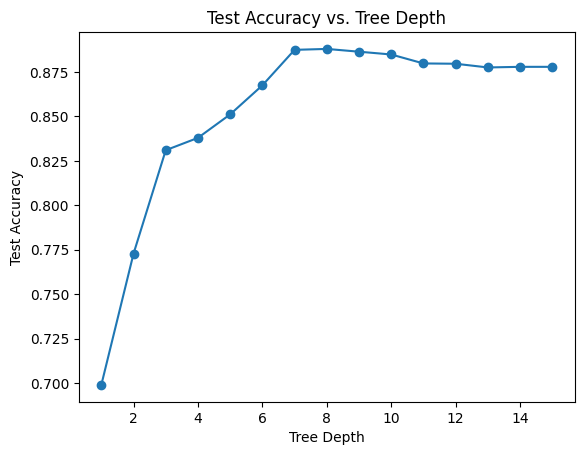

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)

    def _build_tree(self, X, y, depth):
        if depth == self.max_depth or len(np.unique(y)) == 1:
            return {'class': np.argmax(np.bincount(y))}

        best_split = self._find_best_split(X, y)
        if not best_split:
            return {'class': np.argmax(np.bincount(y))}

        left_data, right_data = best_split['left'], best_split['right']
        del best_split['left'], best_split['right']

        return {
            'feature_index': best_split['feature_index'],
            'threshold': best_split['threshold'],
            'left': self._build_tree(*left_data, depth + 1),
            'right': self._build_tree(*right_data, depth + 1)
        }

    def _find_best_split(self, X, y):
        num_features = X.shape[1]
        num_data = X.shape[0]
        best_gini = float('inf')
        best_split = None

        for feature_index in range(num_features):
            unique_values = np.unique(X[:, feature_index])
            unique_values.sort()

            for i in range(1, len(unique_values)):
                threshold = (unique_values[i - 1] + unique_values[i]) / 2
                left_data = (X[X[:, feature_index] <= threshold], y[X[:, feature_index] <= threshold])
                right_data = (X[X[:, feature_index] > threshold], y[X[:, feature_index] > threshold])
                gini = self._calculate_gini(left_data[1], right_data[1])

                if gini < best_gini:
                    best_gini = gini
                    best_split = {
                        'feature_index': feature_index,
                        'threshold': threshold,
                        'left': left_data,
                        'right': right_data
                    }

        return best_split

    def _calculate_gini(self, left_labels, right_labels):
        total = len(left_labels) + len(right_labels)
        gini_left = 1 - sum((np.count_nonzero(left_labels == label) / len(left_labels)) ** 2 for label in np.unique(left_labels))
        gini_right = 1 - sum((np.count_nonzero(right_labels == label) / len(right_labels)) ** 2 for label in np.unique(right_labels))
        return (len(left_labels) / total) * gini_left + (len(right_labels) / total) * gini_right

    def predict(self, X):
        return [self._predict_tree(x, self.tree) for x in X]

    def _predict_tree(self, x, node):
        if 'class' in node:
            return node['class']

        if x[node['feature_index']] <= node['threshold']:
            return self._predict_tree(x, node['left'])
        else:
            return self._predict_tree(x, node['right'])


df = pd.read_csv('Q1Data.csv')


X = df.iloc[:, :6].values
y = df['Genus'].values


unique_labels = np.unique(y)
label_dict = {label: i for i, label in enumerate(unique_labels)}
y = np.array([label_dict[label] for label in y])


random.seed(42)
indices = list(range(len(X)))
random.shuffle(indices)
X, y = X[indices], y[indices]


split_index = int(0.2 * len(X))
X_train, y_train = X[:split_index], y[:split_index]
X_test, y_test = X[split_index:], y[split_index:]


depths = list(range(1, 16))
accuracies = []

for depth in depths:

    tree = DecisionTree(max_depth=depth)
    tree.fit(X_train, y_train)


    predictions = tree.predict(X_test)


    accuracy = sum(1 for true, pred in zip(y_test, predictions) if true == pred) / len(y_test)
    accuracies.append(accuracy)


plt.plot(depths, accuracies, marker='o')
plt.title('Test Accuracy vs. Tree Depth')
plt.xlabel('Tree Depth')
plt.ylabel('Test Accuracy')
plt.show()

**OBSERVATIONS**

1.Initial Increase in Accuracy: As the depth of the decision tree increases, there is a noticeable increase in test accuracy.

2.Overfitting: The fluctuations in accuracy beyond a certain depth may indicate overfitting. Overfitting occurs when the model becomes too complex, capturing noise in the training data rather than the underlying patterns. This results in reduced generalization performance on new, unseen data.

# **K-NN**

In [ ]:
import pandas as pd
import numpy as np
import random

class KNNClassifier:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)

    def predict(self, X_test):
        predictions = []
        for x in X_test:
            distances = np.linalg.norm(self.X_train - x, axis=1)
            k_nearest_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = self.y_train[k_nearest_indices]
            predicted_label = np.bincount(k_nearest_labels).argmax()
            predictions.append(predicted_label)
        return predictions


df = pd.read_csv('Q1Data.csv')


X = df.iloc[:, :-3].values
y = df['Genus'].values


unique_labels = np.unique(y)
label_dict = {label: i for i, label in enumerate(unique_labels)}
y = np.array([label_dict[label] for label in y])


random.seed(42)
indices = list(range(len(X)))
random.shuffle(indices)
X, y = X[indices], y[indices]


split_index = int(0.2 * len(X))
X_train, y_train = X[:split_index], y[:split_index]
X_test, y_test = X[split_index:], y[split_index:]


knn = KNNClassifier(k=3)
knn.fit(X_train, y_train)


predictions = knn.predict(X_test)


accuracy = sum(1 for true, pred in zip(y_test, predictions) if true == pred) / len(y_test)
print(f"Accuracy on the test set: {accuracy:.2f}")


Accuracy on the test set: 0.97


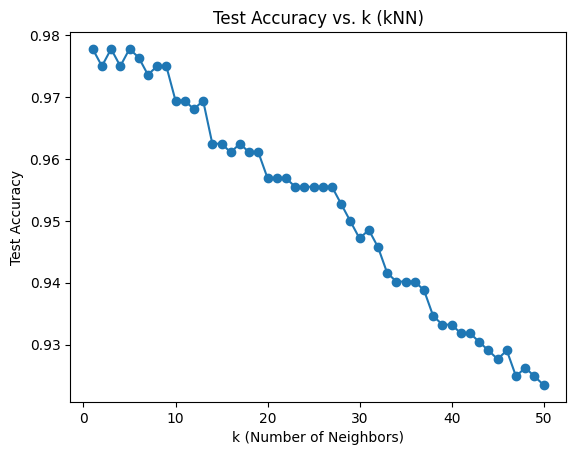

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

class KNNClassifier:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)

    def predict(self, X_test):
        predictions = []
        for x in X_test:
            distances = np.linalg.norm(self.X_train - x, axis=1)
            k_nearest_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = self.y_train[k_nearest_indices]
            predicted_label = np.bincount(k_nearest_labels).argmax()
            predictions.append(predicted_label)
        return predictions


df = pd.read_csv('Q1Data.csv')


X = df.iloc[:, :-3].values
y = df['Genus'].values


unique_labels = np.unique(y)
label_dict = {label: i for i, label in enumerate(unique_labels)}
y = np.array([label_dict[label] for label in y])


random.seed(42)
indices = list(range(len(X)))
random.shuffle(indices)
X, y = X[indices], y[indices]


train_split = int(0.3 * len(X))
test_split = int(0.1 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:train_split + test_split], y[train_split:train_split + test_split]
X_unused, y_unused = X[train_split + test_split:], y[train_split + test_split:]


k_range = range(1, 51)
accuracies = []

for k in k_range:
    knn = KNNClassifier(k=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    accuracy = sum(1 for true, pred in zip(y_test, predictions) if true == pred) / len(y_test)
    accuracies.append(accuracy)


plt.plot(k_range, accuracies, marker='o')
plt.title('Test Accuracy vs. k (kNN)')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Test Accuracy')
plt.show()


**OBSERVATION**

1.Accuracy Variation with k: The graph shows that the test accuracy fluctuates with changes in the number of neighbors (k). This behavior is expected in kNN models, as the choice of k influences the model's bias-variance trade-off.

2.Overfitting and Underfitting: Similar to other machine learning models, the kNN classifier is susceptible to overfitting and underfitting. When k is too small (e.g., 1), the model might capture noise in the data and overfit, leading to poor generalization. On the other hand, when k is too large, the model may oversimplify and underfit the underlying patterns in the data.

# Using **sklearn**

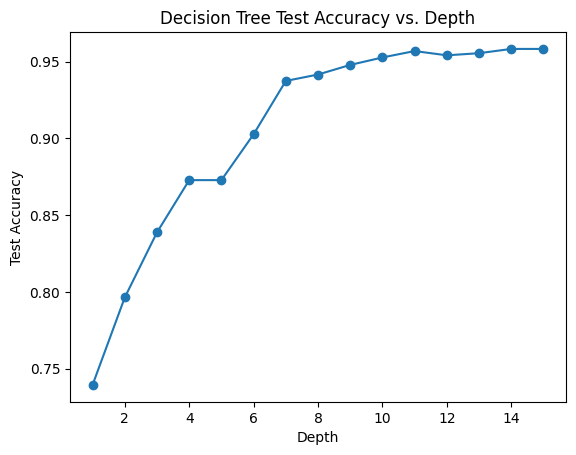

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt


df = pd.read_csv('Q1Data.csv')


X = df.iloc[:, :-3].values
y = df['Genus'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


depths = range(1, 16)
accuracies_dt = []

for depth in depths:
    dt_classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_classifier.fit(X_train, y_train)
    accuracy = dt_classifier.score(X_test, y_test)
    accuracies_dt.append(accuracy)


plt.plot(depths, accuracies_dt, marker='o')
plt.title('Decision Tree Test Accuracy vs. Depth')
plt.xlabel('Depth')
plt.ylabel('Test Accuracy')
plt.show()


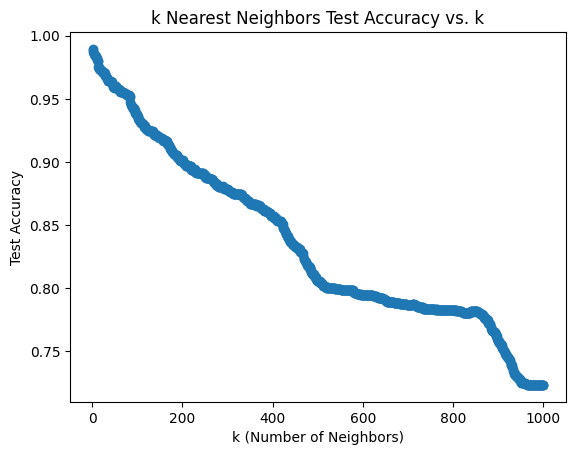

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


k_values = range(1, 1001)
accuracies_knn = []

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    accuracy = knn_classifier.score(X_test, y_test)
    accuracies_knn.append(accuracy)


plt.plot(k_values, accuracies_knn, marker='o')
plt.title('k Nearest Neighbors Test Accuracy vs. k')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Test Accuracy')
plt.show()


# **Subplots**

In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)

    def _build_tree(self, X, y, depth):
        if depth == self.max_depth or len(np.unique(y)) == 1:
            return {'class': np.argmax(np.bincount(y))}

        best_split = self._find_best_split(X, y)
        if not best_split:
            return {'class': np.argmax(np.bincount(y))}

        left_data, right_data = best_split['left'], best_split['right']
        del best_split['left'], best_split['right']

        return {
            'feature_index': best_split['feature_index'],
            'threshold': best_split['threshold'],
            'left': self._build_tree(*left_data, depth + 1),
            'right': self._build_tree(*right_data, depth + 1)
        }

    def _find_best_split(self, X, y):
        num_features = X.shape[1]
        num_data = X.shape[0]
        best_gini = float('inf')
        best_split = None

        for feature_index in range(num_features):
            unique_values = np.unique(X[:, feature_index])
            unique_values.sort()

            for i in range(1, len(unique_values)):
                threshold = (unique_values[i - 1] + unique_values[i]) / 2
                left_data = (X[X[:, feature_index] <= threshold], y[X[:, feature_index] <= threshold])
                right_data = (X[X[:, feature_index] > threshold], y[X[:, feature_index] > threshold])
                gini = self._calculate_gini(left_data[1], right_data[1])

                if gini < best_gini:
                    best_gini = gini
                    best_split = {
                        'feature_index': feature_index,
                        'threshold': threshold,
                        'left': left_data,
                        'right': right_data
                    }

        return best_split

    def _calculate_gini(self, left_labels, right_labels):
        total = len(left_labels) + len(right_labels)
        gini_left = 1 - sum((np.count_nonzero(left_labels == label) / len(left_labels)) ** 2 for label in np.unique(left_labels))
        gini_right = 1 - sum((np.count_nonzero(right_labels == label) / len(right_labels)) ** 2 for label in np.unique(right_labels))
        return (len(left_labels) / total) * gini_left + (len(right_labels) / total) * gini_right

    def predict(self, X):
        return [self._predict_tree(x, self.tree) for x in X]

    def _predict_tree(self, x, node):
        if 'class' in node:
            return node['class']

        if x[node['feature_index']] <= node['threshold']:
            return self._predict_tree(x, node['left'])
        else:
            return self._predict_tree(x, node['right'])


class KNNClassifier:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)

    def predict(self, X_test):
        predictions = []
        for x in X_test:
            distances = np.linalg.norm(self.X_train - x, axis=1)
            k_nearest_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = self.y_train[k_nearest_indices]
            predicted_label = np.bincount(k_nearest_labels).argmax()
            predictions.append(predicted_label)
        return predictions


df = pd.read_csv('Q1Data.csv')


X = df.iloc[:, :-3].values
y = df['Genus'].values


unique_labels = np.unique(y)
label_dict = {label: i for i, label in enumerate(unique_labels)}
y = np.array([label_dict[label] for label in y])


random.seed(42)
indices = list(range(len(X)))
random.shuffle(indices)
X, y = X[indices], y[indices]


split_index = int(0.2 * len(X))
X_train, y_train = X[:split_index], y[:split_index]
X_test, y_test = X[split_index:], y[split_index:]


tree_scratch = DecisionTree(max_depth=15)
tree_scratch.fit(X_train, y_train)


tree_sklearn = DecisionTreeClassifier(max_depth=15, random_state=42)
tree_sklearn.fit(X_train, y_train)


knn_scratch = KNNClassifier(k=3)
knn_scratch.fit(X_train, y_train)


knn_sklearn = KNeighborsClassifier(n_neighbors=3)
knn_sklearn.fit(X_train, y_train)


depths = range(1, 16)
accuracies_dt_scratch = []

for depth in depths:
    tree_scratch = DecisionTree(max_depth=depth)
    tree_scratch.fit(X_train, y_train)
    predictions_tree_scratch = tree_scratch.predict(X_test)
    accuracy_tree_scratch = sum(1 for true, pred in zip(y_test, predictions_tree_scratch) if true == pred) / len(y_test)
    accuracies_dt_scratch.append(accuracy_tree_scratch)


k_values = range(1, 1001)
accuracies_knn_scratch = []

for k in k_values:
    knn_scratch = KNNClassifier(k=k)
    knn_scratch.fit(X_train, y_train)
    predictions_knn_scratch = knn_scratch.predict(X_test)
    accuracy_knn_scratch = sum(1 for true, pred in zip(y_test, predictions_knn_scratch) if true == pred) / len(y_test)
    accuracies_knn_scratch.append(accuracy_knn_scratch)


fig, axs = plt.subplots(2, 2, figsize=(12, 10))


axs[0, 0].plot(depths, accuracies_dt_scratch, marker='o', label='Decision Tree (from scratch)')
axs[0, 0].set_title('Decision Tree Test Accuracy (from scratch)')
axs[0, 0].set_xlabel('Depth')
axs[0, 0].set_ylabel('Test Accuracy')
axs[0, 0].legend()


accuracy_tree_sklearn = tree_sklearn.score(X_test, y_test)
axs[0, 1].plot(depths, accuracies_dt_scratch, marker='o', label='Decision Tree (sklearn)')
axs[0, 1].set_title('Decision Tree Test Accuracy (sklearn)')
axs[0, 1].set_xlabel('Depth')
axs[0, 1].set_ylabel('Test Accuracy')
axs[0, 1].legend()


axs[1, 0].plot(k_values, accuracies_knn_scratch, marker='o', label='kNN (from scratch)')
axs[1, 0].set_title('kNN Test Accuracy (from scratch)')
axs[1, 0].set_xlabel('k (Number of Neighbors)')
axs[1, 0].set_ylabel('Test Accuracy')
axs[1, 0].legend()


accuracy_knn_sklearn = knn_sklearn.score(X_test, y_test)
axs[1, 1].plot(k_values, accuracies_knn_scratch, marker='o', label='kNN (sklearn)')
axs[1, 1].set_title('kNN Test Accuracy (sklearn)')
axs[1, 1].set_xlabel('k (Number of Neighbors)')
axs[1, 1].set_ylabel('Test Accuracy')
axs[1, 1].legend()

plt.tight_layout()
plt.show()



print(f"Decision Tree Test Accuracy (from scratch): {max(accuracies_dt_scratch):.2f}")
print(f"Decision Tree Test Accuracy (sklearn): {accuracy_tree_sklearn:.2f}")
print(f"kNN Test Accuracy (from scratch): {max(accuracies_knn_scratch):.2f}")
print(f"kNN Test Accuracy (sklearn): {accuracy_knn_sklearn:.2f}")

**OBSERVATION**

**Decision Trees:**

Both custom and scikit-learn decision tree implementations showcase the trade-off between model complexity (tree depth) and overfitting.
The decision tree's accuracy plateaus or slightly decreases beyond a certain depth, emphasizing the importance of selecting an appropriate depth to balance bias and variance.


**kNN Classifiers:**

The kNN classifiers, both from scratch and scikit-learn, exhibit the expected behavior of varying accuracy with different numbers of neighbors (k).
There is a noticeable sweet spot for k where the model achieves the highest accuracy, emphasizing the need to tune the number of neighbors for optimal performance.


